In [156]:
library(ggplot2)
library(umap)
library(ggrepel)
library(tidyr)
library(scales)
library(stringr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
RNAseq_Actg1_M <- read.csv("/home/ylee/blast/result/dst66_RNAseq_Mohamed_Actg1_rnaseq.csv", sep=";", dec=',', header=TRUE)
RNAseq_Actg1_L <- read.csv("/home/ylee/blast/result/dst176_RNAseq_Lihan_Actg1.csv", sep=";", skip=11, dec=',', header=TRUE)

In [6]:
gene_list_M <- as.vector(RNAseq_Actg1_M$Ensembl.gene.id)
gene_list_L <- as.vector(RNAseq_Actg1_M$Ensembl.gene.id)

In [7]:
RNAseq_M <- data.frame(Ensembl.gene.id = RNAseq_Actg1_M$Ensembl.gene.id, 
                            Ensembl.gene = RNAseq_Actg1_M$Ensembl.gene, 
                            M_WT_1 = RNAseq_Actg1_M$Actg1.WT_1,
                            M_WT_2 = RNAseq_Actg1_M$Actg1.WT_2,
                            M_NSD_1 = RNAseq_Actg1_M$Actg1.NSD_1,
                            M_NSD_2 = RNAseq_Actg1_M$Actg1.NSD_2,
                            M_DEL_1 = RNAseq_Actg1_M$Actg1.del_1, 
                            M_DEL_2 = RNAseq_Actg1_M$Actg1.del_2
                           )

In [8]:
summary(RNAseq_M)

 Ensembl.gene.id    Ensembl.gene           M_WT_1            M_WT_2       
 Length:21615       Length:21615       Min.   :      0   Min.   :      0  
 Class :character   Class :character   1st Qu.:      6   1st Qu.:      6  
 Mode  :character   Mode  :character   Median :     54   Median :     57  
                                       Mean   :    995   Mean   :   1005  
                                       3rd Qu.:    634   3rd Qu.:    622  
                                       Max.   :2125414   Max.   :2477162  
    M_NSD_1             M_NSD_2             M_DEL_1             M_DEL_2       
 Min.   :      0.0   Min.   :      0.0   Min.   :      0.0   Min.   :      0  
 1st Qu.:      9.0   1st Qu.:      8.0   1st Qu.:      7.0   1st Qu.:      6  
 Median :     66.0   Median :     65.0   Median :     56.0   Median :     52  
 Mean   :    939.4   Mean   :    950.2   Mean   :   1000.6   Mean   :   1022  
 3rd Qu.:    601.5   3rd Qu.:    613.0   3rd Qu.:    601.5   3rd Qu.:    630  
 

Warning message in scale_y_log10(labels = comma):
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10(labels = comma):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 6168 rows containing non-finite outside the scale range (`stat_boxplot()`).”


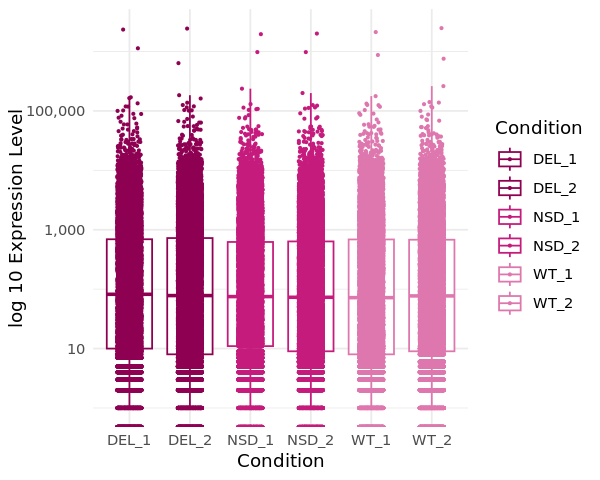

In [162]:
options(repr.plot.width=5, repr.plot.height=4)

# Reshape the data into long format
RNAseq_M_long <- RNAseq_M %>%
  pivot_longer(cols = starts_with("M_"), 
               names_to = "Condition", 
               values_to = "Expression")%>%
  mutate(Condition = sub("^M_", "", Condition))

# Create the boxplot with jittered points
ggplot(RNAseq_M_long, aes(x = Condition, y = Expression, color = Condition)) +
    geom_boxplot(outlier.shape = NA) +  # Disable default outliers
    geom_jitter(width = 0.2, size = 0.5) +  # Add jittered points with a small width to spread the points
    scale_color_manual(values = c("#8e0152", "#8e0152", 
                                  "#c51b7d", "#c51b7d", 
                                  "#de77ae", "#de77ae")) +  # Custom colors
    scale_y_log10(labels = comma)+   #, limits = c(1, 3000000)) +  
    theme_minimal() +
    labs(x = "Condition", y = "log 10 Expression Level")



options(repr.plot.width=7, repr.plot.height=4)

In [9]:
RNAseq_L <- data.frame(Ensembl.gene.id = RNAseq_Actg1_L$Ensembl.gene.id, 
                            Ensembl.gene = RNAseq_Actg1_L$Ensembl.gene, 
                            L_WT_1 = RNAseq_Actg1_L$WT_1, 
                            L_WT_2 = RNAseq_Actg1_L$WT_2,
                            L_WT_3 = RNAseq_Actg1_L$WT_3,
                            L_PTC_1 = RNAseq_Actg1_L$PTC_1,
                            L_PTC_2 = RNAseq_Actg1_L$PTC_2,
                            L_PTC_3 = RNAseq_Actg1_L$PTC_3,
                            L_NSD_1 = RNAseq_Actg1_L$NSD_1,
                            L_NSD_2 = RNAseq_Actg1_L$NSD_2,
                            L_NSD_3 = RNAseq_Actg1_L$NSD_3,
                            L_FLD_1 = RNAseq_Actg1_L$FLD_1,
                            L_FLD_2 = RNAseq_Actg1_L$FLD_2,
                            L_FLD_3 = RNAseq_Actg1_L$FLD_3
                           )

In [81]:
summary(RNAseq_L)

 Ensembl.gene.id    Ensembl.gene           L_WT_1           L_WT_2    
 Length:18555       Length:18555       Min.   :   0.0   Min.   :   0  
 Class :character   Class :character   1st Qu.:   4.0   1st Qu.:   4  
 Mode  :character   Mode  :character   Median : 102.0   Median :  95  
                                       Mean   : 267.5   Mean   : 275  
                                       3rd Qu.: 423.0   3rd Qu.: 429  
                                       Max.   :4080.0   Max.   :4777  
     L_WT_3          L_PTC_1          L_PTC_2          L_PTC_3      
 Min.   :   0.0   Min.   :   0.0   Min.   :   0.0   Min.   :   0.0  
 1st Qu.:   4.0   1st Qu.:   4.0   1st Qu.:   3.0   1st Qu.:   4.0  
 Median :  95.0   Median :  92.0   Median :  83.0   Median :  88.0  
 Mean   : 275.9   Mean   : 280.4   Mean   : 279.6   Mean   : 278.5  
 3rd Qu.: 430.0   3rd Qu.: 436.0   3rd Qu.: 425.0   3rd Qu.: 430.0  
 Max.   :4868.0   Max.   :5420.0   Max.   :6145.0   Max.   :5420.0  
    L_NSD_1         

Warning message in scale_y_log10(labels = comma, limits = c(1, 3e+06)):
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10(labels = comma, limits = c(1, 3e+06)):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 18221 rows containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 7936 rows containing missing values or values outside the scale range (`geom_point()`).”


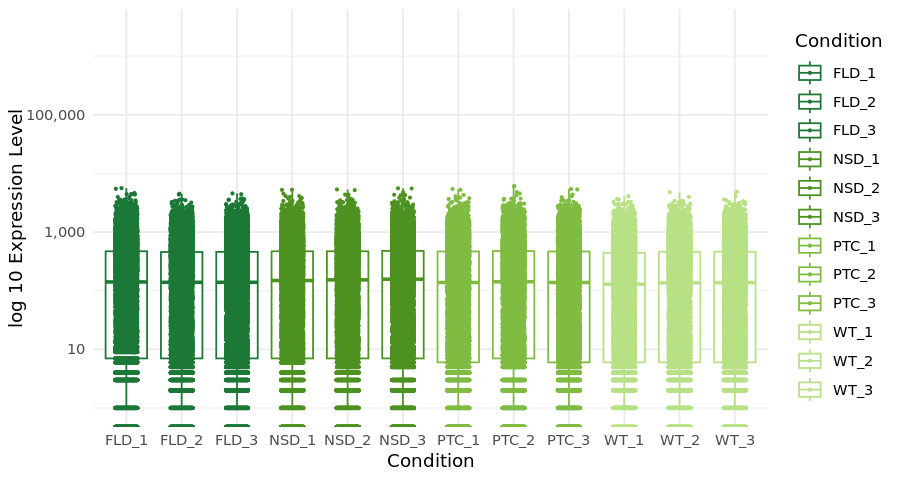

In [165]:
options(repr.plot.width=7.5, repr.plot.height=4)

# Reshape the data into long format
RNAseq_L_long <- RNAseq_L %>%
  pivot_longer(cols = starts_with("L_"), 
               names_to = "Condition", 
               values_to = "Expression")%>%
  mutate(Condition = sub("^L_", "", Condition))

# Create the boxplot with jittered points
ggplot(RNAseq_L_long, aes(x = Condition, y = Expression, color = Condition)) +
    geom_boxplot(outlier.shape = NA) +  # Disable default outliers
    geom_jitter(width = 0.2, size = 0.5) +  # Add jittered points with a small width to spread the points
    scale_color_manual(values = c("#1b7837", "#1b7837", "#1b7837", 
                                  "#4d9221", "#4d9221", "#4d9221", 
                                  "#7fbc41", "#7fbc41", "#7fbc41",
                                  "#b8e186", "#b8e186", "#b8e186")) +  # Custom colors
    scale_y_log10(labels = comma, limits = c(1, 3000000)) +  
    theme_minimal() +
    labs(x = "Condition", y = "log 10 Expression Level")

In [11]:
# Find genes in RNAseq_M but not in RNAseq_L
diff_M <- setdiff(RNAseq_M$Ensembl.gene.id, RNAseq_L$Ensembl.gene.id)

# Find genes in RNAseq_L but not in RNAseq_M
diff_L <- setdiff(RNAseq_L$Ensembl.gene.id, RNAseq_M$Ensembl.gene.id)

# Output the different genes
print("Genes in RNAseq_M but not in RNAseq_L:")
print(diff_M)

print("Genes in RNAseq_L but not in RNAseq_M:")
print(diff_L)

[1] "Genes in RNAseq_M but not in RNAseq_L:"
   [1] "ENSMUSG00000064339" "ENSMUSG00000097971" "ENSMUSG00000064337"
   [4] "ENSMUSG00000064351" "ENSMUSG00000064341" "ENSMUSG00000064367"
   [7] "ENSMUSG00000092837" "ENSMUSG00000064345" "ENSMUSG00000064370"
  [10] "ENSMUSG00000064368" "ENSMUSG00000064363" "ENSMUSG00000088088"
  [13] "ENSMUSG00000064816" "ENSMUSG00000090673" "ENSMUSG00000098178"
  [16] "ENSMUSG00000096349" "ENSMUSG00000079065" "ENSMUSG00000098973"
  [19] "ENSMUSG00000065265" "ENSMUSG00000065289" "ENSMUSG00000091383"
  [22] "ENSMUSG00000069305" "ENSMUSG00000054178" "ENSMUSG00000071516"
  [25] "ENSMUSG00000064453" "ENSMUSG00000021871" "ENSMUSG00000065228"
  [28] "ENSMUSG00000065160" "ENSMUSG00000067736" "ENSMUSG00000084667"
  [31] "ENSMUSG00000104235" "ENSMUSG00000109836" "ENSMUSG00000103373"
  [34] "ENSMUSG00000064966" "ENSMUSG00000091562" "ENSMUSG00000080463"
  [37] "ENSMUSG00000084911" "ENSMUSG00000105356" "ENSMUSG00000097206"
  [40] "ENSMUSG00000069273" "ENSMUSG000000688

In [12]:
# Find common genes
common_genes <- intersect(RNAseq_M$Ensembl.gene.id, RNAseq_L$Ensembl.gene.id)

# Subset the datasets based on common genes
RNAseq_M_common <- RNAseq_M[RNAseq_M$Ensembl.gene.id %in% common_genes, ]
RNAseq_L_common <- RNAseq_L[RNAseq_L$Ensembl.gene.id %in% common_genes, ]

In [13]:
summary(RNAseq_L_common)

 Ensembl.gene.id    Ensembl.gene           L_WT_1           L_WT_2      
 Length:16319       Length:16319       Min.   :   0.0   Min.   :   0.0  
 Class :character   Class :character   1st Qu.:   9.0   1st Qu.:   8.0  
 Mode  :character   Mode  :character   Median : 172.0   Median : 169.0  
                                       Mean   : 303.3   Mean   : 311.8  
                                       3rd Qu.: 474.0   3rd Qu.: 483.0  
                                       Max.   :4080.0   Max.   :4777.0  
     L_WT_3          L_PTC_1        L_PTC_2          L_PTC_3      
 Min.   :   0.0   Min.   :   0   Min.   :   0.0   Min.   :   0.0  
 1st Qu.:   8.0   1st Qu.:   8   1st Qu.:   8.0   1st Qu.:   8.0  
 Median : 167.0   Median : 165   Median : 155.0   Median : 162.0  
 Mean   : 312.9   Mean   : 318   Mean   : 317.1   Mean   : 315.8  
 3rd Qu.: 483.0   3rd Qu.: 489   3rd Qu.: 483.5   3rd Qu.: 485.0  
 Max.   :4868.0   Max.   :5420   Max.   :6145.0   Max.   :5420.0  
    L_NSD_1         

In [97]:
# Set Ensembl.gene.id as rownames
rownames(RNAseq_M_common) <- RNAseq_M_common$Ensembl.gene.id
rownames(RNAseq_L_common) <- RNAseq_L_common$Ensembl.gene.id

# Remove the Ensembl.gene.id column from the data since it's now rownames
RNAseq_M_common <- RNAseq_M_common[, -1]
RNAseq_L_common <- RNAseq_L_common[, -1]

# Perform log transformation to normalize the counts (adding a small offset to avoid log(0))
RNAseq_M_norm <- log2(RNAseq_M_common[, 3:ncol(RNAseq_M_common)] + 1)
RNAseq_L_norm <- log2(RNAseq_L_common[, 3:ncol(RNAseq_L_common)] + 1)

In [15]:
# Merge the two datasets by Ensembl.gene.id
merged_data <- merge(RNAseq_M_norm, RNAseq_L_norm, by="row.names")
colnames(merged_data)[1] <- "Ensembl.gene.id"

In [17]:
# Perform PCA on merged data (excluding the gene id column)
pca_res <- prcomp(t(merged_data[, -1]), scale. = TRUE)

# Create a data frame for PCA results
pca_df <- data.frame(PC1 = pca_res$x[, 1], PC2 = pca_res$x[, 2], 
                     PC3 = pca_res$x[, 3], PC4 = pca_res$x[, 4], PC4 = pca_res$x[, 5])

# Add the column names (sample names) as labels
pca_df$Sample <- colnames(merged_data[, -1])
split_conditions <- strsplit(pca_df$Sample, "_")
pca_df$Condition1 <- sapply(split_conditions, `[`, 1)
pca_df$Condition2 <- sapply(split_conditions, function(x) paste(x[1], x[2], sep = "_"))

In [19]:
# Get the standard deviations (from your `pca_res` object)
std_devs <- pca_res$sdev

# Compute variance explained
var_explained <- (std_devs^2) / sum(std_devs^2)

# Convert to percentage
percent_var_explained <- var_explained * 100

# Print the percentage variance explained by each principal component
percent_var_explained

[1] 5.510081e+01 1.480772e+01 6.865096e+00 6.105561e+00 4.331186e+00
 [6] 2.665917e+00 1.644582e+00 1.489360e+00 1.201854e+00 1.116570e+00
[11] 1.083706e+00 9.650595e-01 8.945507e-01 8.813212e-01 8.467007e-01
[16] 1.225250e-28

In [27]:
pca_res$x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
M_WT_2,-135.27490,38.0250817,-22.075884,-0.1513346,65.473625,-45.1064038,-5.168914,5.855353,0.6690310,-0.3009274,0.7173671,0.4384908,-0.6442949,-0.1254949,-0.50739409,1.595113e-13
M_NSD_1,-137.40907,-87.7319685,-25.373642,19.7967469,-13.791675,8.2456798,9.028651,1.582019,36.8742319,-0.3228875,2.4499701,3.8354922,0.1777506,-1.1536424,0.01104586,1.902783e-13
M_NSD_2,-138.00434,-86.1220856,-23.494065,17.9962250,-13.466490,6.3484908,-2.987494,-4.538347,-37.9492169,1.5958358,-3.3701366,-4.8917995,-0.1655565,1.5277843,0.33630806,9.549306e-14
M_DEL_1,-131.68909,70.8694394,35.217608,-19.9309005,-23.131245,15.7159593,21.979022,35.770261,-4.9840963,-2.0036268,0.8283552,0.3924275,0.3505054,-0.9120124,-0.22354371,8.810834e-14
M_DEL_2,-138.07082,68.9646189,32.110149,-21.8517067,-17.597594,13.0333973,-21.358261,-37.760782,5.4258479,1.8843367,-1.0342325,-0.2238229,-0.1164395,0.6416865,0.32589414,1.557920e-13
L_WT_2,58.87954,14.9912912,-2.899578,21.1598483,38.723498,34.1663092,12.058393,-6.126940,-0.3094579,-3.5263247,-0.6986648,-6.7522831,-21.6771569,-1.6526970,23.58923360,1.399991e-13
L_WT_3,57.27862,14.2420662,-3.255714,21.9975433,39.843666,35.4835488,10.563648,-6.134348,-2.0118925,3.9948630,-1.3256662,5.5683135,22.2024302,2.9436943,-22.47499503,1.098115e-13
L_PTC_1,55.63778,-44.4277395,49.594194,-4.2858654,7.399851,-5.1366166,-15.182789,5.967454,-0.8559467,-16.4153321,14.8464672,3.6392290,23.5719187,-3.6230089,19.78670198,1.527875e-13
L_PTC_2,63.09291,-43.0845112,56.463195,-10.8127363,2.627995,-18.6774651,10.575459,-2.423593,1.0220655,32.5669540,-19.7283667,7.7662677,-2.0965384,3.3271284,4.05820284,1.358913e-13
L_PTC_3,58.92488,-44.3731398,51.683374,-6.2689647,5.259677,-7.9707662,-5.299997,1.366997,1.1718317,-18.3965780,6.6784660,-10.3585275,-21.3537463,-0.6166077,-24.13637345,7.042977e-14


In [38]:
M_NSD_samples <- c("M_NSD_1", "M_NSD_2")
L_NSD_samples <- c("L_NSD_1", "L_NSD_2", "L_NSD_3")

total_distance <- 0
count <- 0

for (m_sample in M_NSD_samples) {
  for (l_sample in L_NSD_samples) {
    # Extract PC scores
    pc_M_NSD <- pca_res$x[m_sample, c(2, 3, 4, 5)]
    pc_L_NSD <- pca_res$x[l_sample, c(2, 3, 4, 5)]
    
    # Weighted difference between M_NSD and L_NSD
    weights <- percent_var_explained[c(2, 3, 4, 5)] / 100
    weighted_diff <- (pc_M_NSD - pc_L_NSD) * sqrt(weights)
    
    # Weighted Euclidean distance
    distance <- sqrt(sum(weighted_diff^2))
    
    total_distance <- total_distance + distance
    count <- count + 1 
  }
}

average_distance <- total_distance / count
average_distance

[1] 36.85887

In [ ]:
count

In [37]:
M_NSD_samples <- c("M_NSD_1", "M_NSD_2")
L_PTC_samples <- c("L_PTC_1", "L_PTC_2", "L_PTC_3")

total_distance <- 0
count <- 0

for (m_sample in M_NSD_samples) {
  for (l_sample in L_PTC_samples) {
    # Extract PC scores
    pc_M_NSD <- pca_res$x[m_sample, c(2, 3, 4, 5)]
    pc_L_NSD <- pca_res$x[l_sample, c(2, 3, 4, 5)]
    
    # Weighted difference between M_NSD and L_NSD
    weights <- percent_var_explained[c(2, 3, 4, 5)] / 100
    weighted_diff <- (pc_M_NSD - pc_L_NSD) * sqrt(weights)
    
    # Weighted Euclidean distance
    distance <- sqrt(sum(weighted_diff^2))
    
    total_distance <- total_distance + distance
    count <- count + 1 
  }
}

average_distance <- total_distance / count
average_distance

[1] 27.16006

In [46]:
pca_df$Condition2

[1] "M_WT"  "M_NSD" "M_NSD" "M_DEL" "M_DEL" "L_WT"  "L_WT"  "L_PTC" "L_PTC"
[10] "L_PTC" "L_NSD" "L_NSD" "L_NSD" "L_FLD" "L_FLD" "L_FLD"

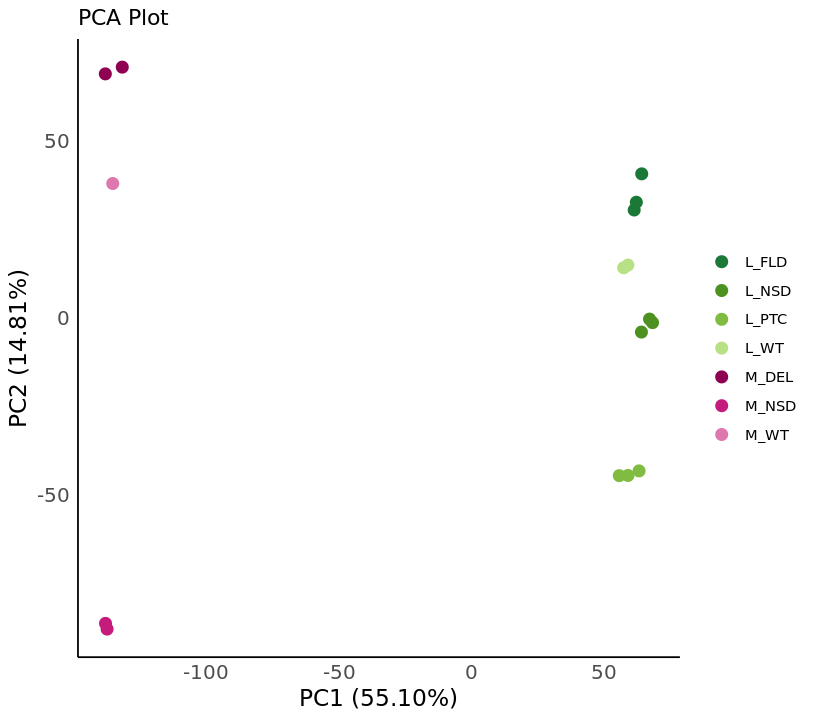

In [77]:
options(repr.plot.width=6.8, repr.plot.height=6)

ggplot(pca_df, aes(x = PC1, y = PC2, color = Condition2, label = Condition2)) +
    geom_point(size = 3) +
    # geom_text_repel(size = 3, box.padding = 0.5, max.overlaps = Inf)
    # geom_text(vjust = -1, size = 3) +  # Adjust label position
    labs(title = "PCA Plot", x = "PC1 (55.10%)", y = "PC2 (14.81%)") +    
    theme_minimal() +
    theme(
    legend.title = element_blank(),
    axis.text = element_text(size = 12),  # Bold and enlarge axis text
    axis.title = element_text(size = 14),  # Bold and enlarge axis titles
    axis.line = element_line(linewidth = 0.5, color = "black"),  # Bold the axis lines
    panel.grid.major = element_blank(),  # Remove major gridlines
    panel.grid.minor = element_blank()  # Remove minor gridlines
  ) +
    scale_color_manual(values = c("M_WT" = "#de77ae", 
                                  "M_NSD" = "#c51b7d", 
                                  "M_DEL" = "#8e0152",
                                  "L_WT" = "#b8e186",
                                  "L_PTC" = "#7fbc41",
                                  "L_NSD" = "#4d9221",
                                  "L_FLD" = "#1b7837"
                                 ))

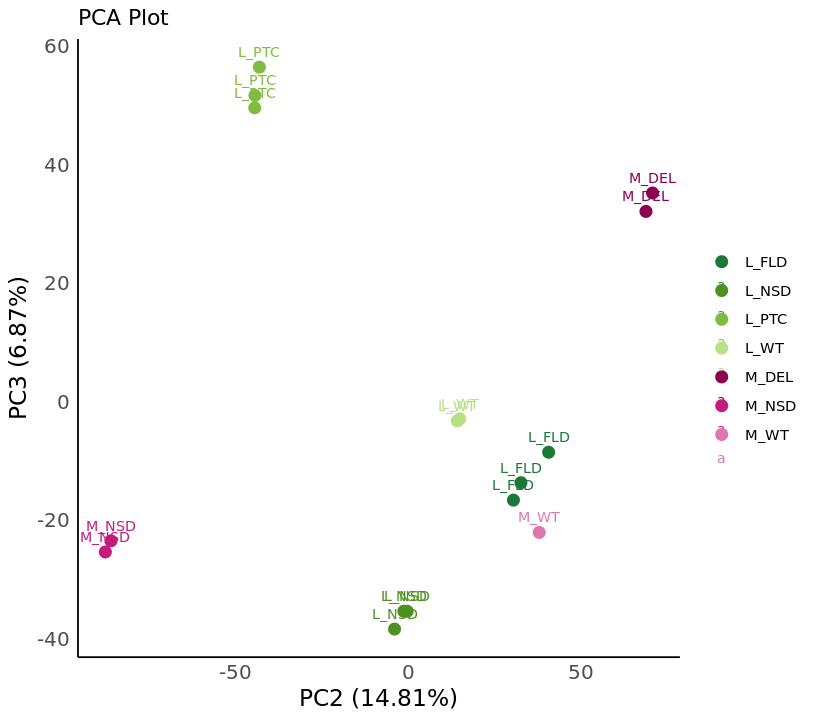

In [80]:
options(repr.plot.width=6.8, repr.plot.height=6)

ggplot(pca_df, aes(x = PC2, y = PC3, color = Condition2, label = Condition2)) +
    geom_point(size = 3) +
    # geom_text_repel(size = 3, box.padding = 0.5, max.overlaps = Inf)
    geom_text(vjust = -1, size = 3) +  # Adjust label position
    labs(title = "PCA Plot", x = "PC2 (14.81%)", y = "PC3 (6.87%)") +    
    theme_minimal() +
    theme(
    legend.title = element_blank(),
    axis.text = element_text(size = 12),  # Bold and enlarge axis text
    axis.title = element_text(size = 14),  # Bold and enlarge axis titles
    axis.line = element_line(linewidth = 0.5, color = "black"),  # Bold the axis lines
    panel.grid.major = element_blank(),  # Remove major gridlines
    panel.grid.minor = element_blank()  # Remove minor gridlines
  ) +
    scale_color_manual(values = c("M_WT" = "#de77ae", 
                                  "M_NSD" = "#c51b7d", 
                                  "M_DEL" = "#8e0152",
                                  "L_WT" = "#b8e186",
                                  "L_PTC" = "#7fbc41",
                                  "L_NSD" = "#4d9221",
                                  "L_FLD" = "#1b7837"
                                 ))

In [109]:
umap_result <- umap(pca_res$x)  # Here, pca_res$x are the PCA scores

# Convert UMAP result to a data frame
umap_df <- as.data.frame(umap_result$layout)
colnames(umap_df) <- c("UMAP1", "UMAP2")



In [111]:
# Add the sample labels to UMAP results
umap_df$Sample <- rownames(umap_df)
umap_df$Condition1 <- sapply(split_conditions, `[`, 1)
umap_df$Condition2 <- sapply(split_conditions, function(x) paste(x[1], x[2], sep = "_"))

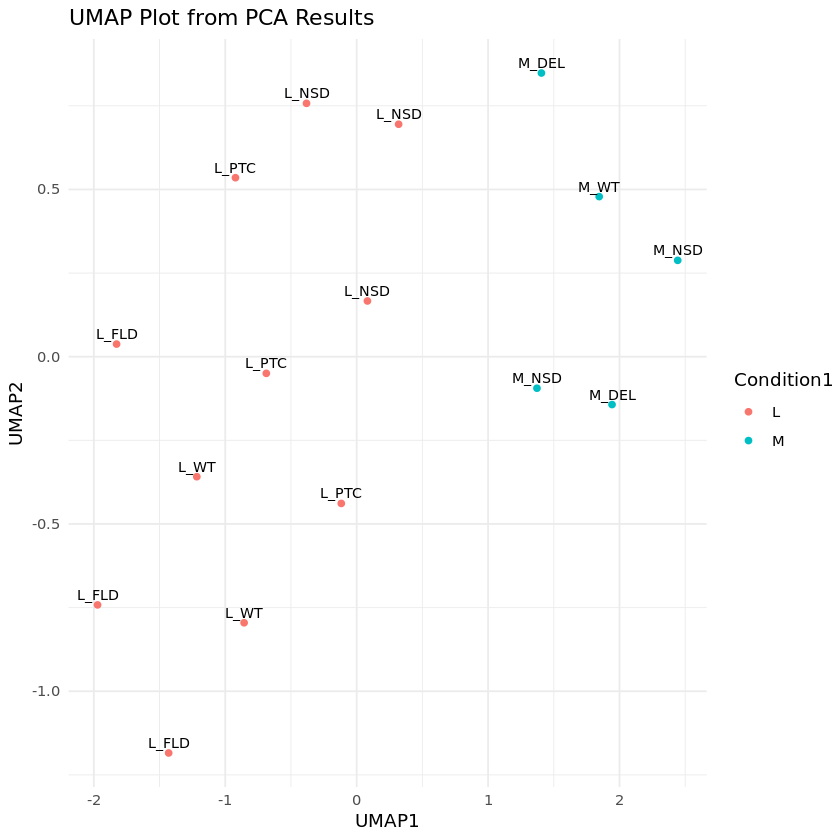

In [115]:
ggplot(umap_df, aes(x = UMAP1, y = UMAP2, label = Condition2)) +
  geom_point(aes(color = Condition1)) +  # Color by your defined condition
  geom_text(vjust = -0.5, size = 3) +     # Add sample labels
  labs(title = "UMAP Plot from PCA Results", x = "UMAP1", y = "UMAP2") +
  theme_minimal()